In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)
data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed


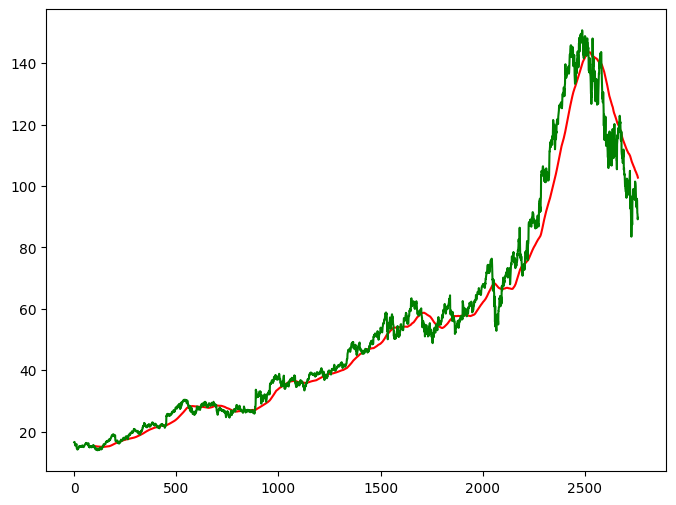

In [3]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

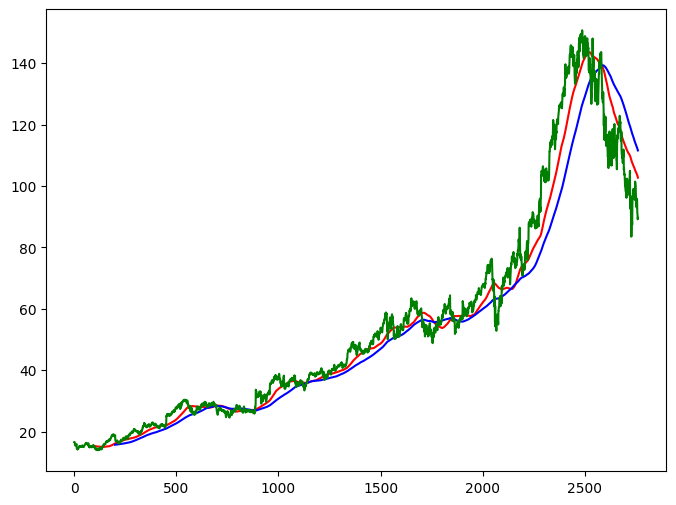

In [4]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [5]:
data.dropna(inplace=True)
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])
print(data_train.shape[0])
print(data_test.shape[0])

2208
553


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler.fit_transform(data_train)

In [7]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100:i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)

In [8]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
66/66 [==============================] - 38s 425ms/step - loss: 0.0310
Epoch 2/50
66/66 [==============================] - 15s 217ms/step - loss: 0.0075
Epoch 3/50
66/66 [==============================] - 10s 150ms/step - loss: 0.0060
Epoch 4/50
66/66 [==============================] - 26s 399ms/step - loss: 0.0061
Epoch 5/50
66/66 [==============================] - 23s 343ms/step - loss: 0.0051
Epoch 6/50
66/66 [==============================] - 9s 139ms/step - loss: 0.0047
Epoch 7/50
66/66 [==============================] - 9s 138ms/step - loss: 0.0045
Epoch 8/50
66/66 [==============================] - 16s 249ms/step - loss: 0.0047
Epoch 9/50
66/66 [==============================] - 27s 411ms/step - loss: 0.0040
Epoch 10/50
66/66 [==============================] - 18s 268ms/step - loss: 0.0044
Epoch 11/50
66/66 [==============================] - 17s 254ms/step - loss: 0.0037
Epoch 12/50
66/66 [==============================] - 28s 419ms/step - loss: 0.0036
Epoch 13/50
66/

In [10]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale=scaler.fit_transform(data_test)

In [11]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [12]:
y_predict = model.predict(x)
scale =1/scaler.scale_
y_predict = y_predict*scale
y = y*scale

18/18 [==============================] - 3s 123ms/step


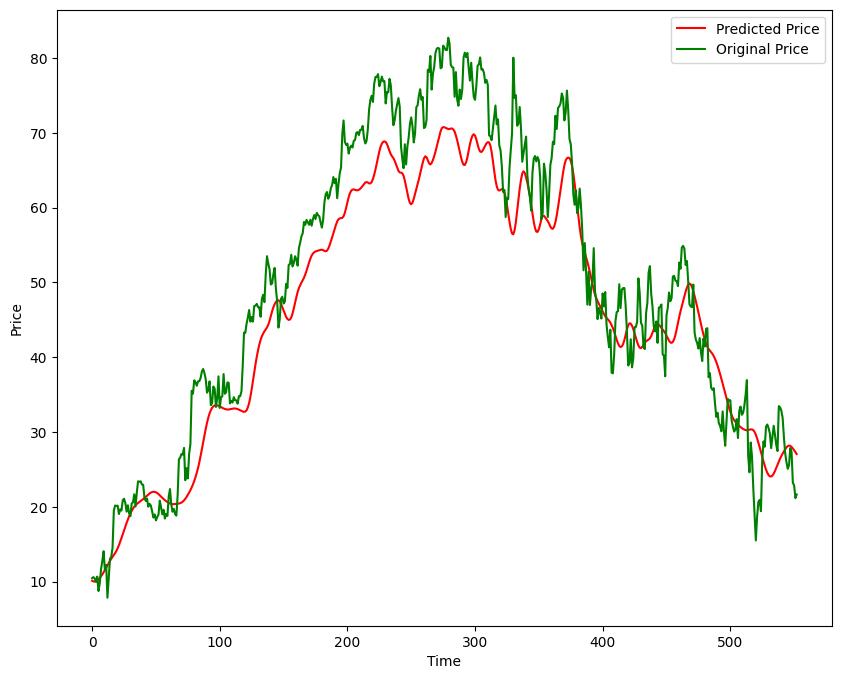

In [13]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
model.save('Stock Predictions Model.keras')

In [15]:
# Creating a simple app to show the stock prediction using streamlit

import numpy as np
import pandas as pd
import yfinance as yf
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt

In [16]:
model=load_model('Stock Predictions Model.keras')

st.header("stock market predictor")

stock=st.text_input('enter the stock symbol','GOOG')

start='2012-01-01'
end='2022-12-31'

data=yf.download(stock,start,end)

st.subheader('stock data')
st.write(data)

2024-01-04 17:30:01.392 
  command:

    streamlit run C:\Users\AKASH\PycharmProjects\ML\venv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


[*********************100%%**********************]  1 of 1 completed


In [18]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

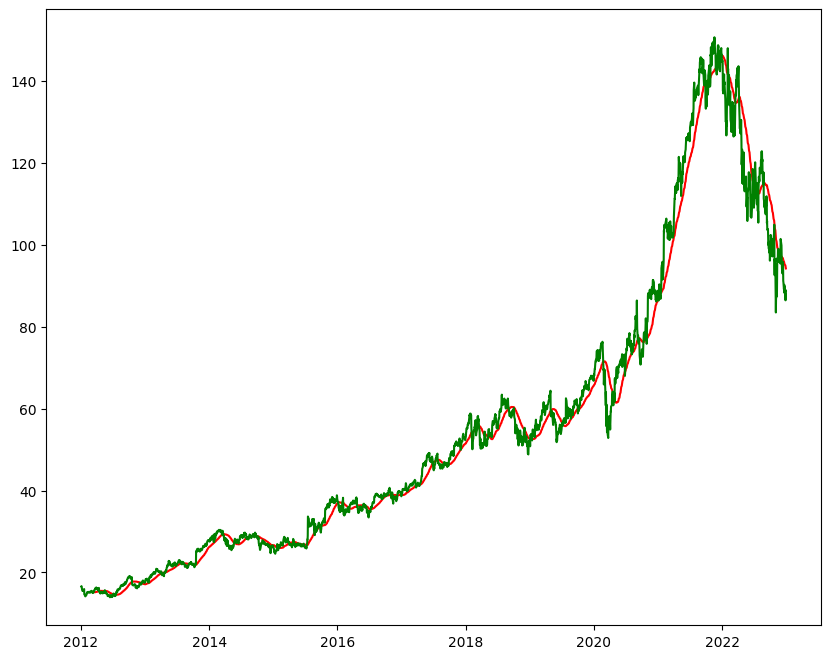

DeltaGenerator()

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale=scaler.fit_transform(data_test)

st.subheader('MA50')
ma_50_days=data.Close.rolling(50).mean()
fig1=plt.figure(figsize=(10,8))
plt.plot(ma_50_days,'r')
plt.plot(data.Close,'g')
plt.show()
st.pyplot(fig1)

In [20]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y=np.array(x),np.array(y)

predict = model.predict(x)
scale=1/scaler.scale_

predict=predict*scale
y=y*scale

18/18 [==============================] - 3s 112ms/step


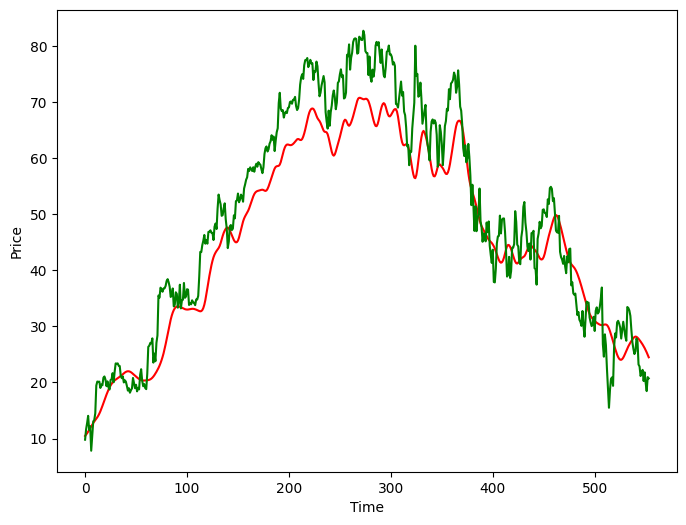

DeltaGenerator()

In [21]:
st.subheader('Oiginal Price (vs) Predicted Price')
fig4=plt.figure(figsize=(8,6))
plt.plot(predict,'r',label='Original Price')
plt.plot(y,'g',label='Predicted Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
st.pyplot(fig4)

In [ ]:
# run "streamlit run app.py" in terminal note: 'app' is the name of the file